In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
"""Inicjalizacja matplotlib'a - ustalenie rozmiaru wykresów"""
plt.figure(figsize=(16, 16))

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

In [3]:
"""Stałe pomocnicze"""
month_names = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
month_length = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
week_day_names = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
week_day_names_short = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]

In [4]:
def validate_data_barplot(counts):
    """Sprawdzenie czy dane dla barplot nie są puste"""
    return sum(counts) > 0  

def validate_data_histogram(data):
    """Sprawdzenie czy dane dla histogramu nie są puste"""
    return len(data) > 0 

In [15]:
def print_analyzing_dataframe(unique, counts):
    """Wydrukowanie na ekran zawartości dataframe'u o zadanych etykietach i jednym rzędzie danych"""
    counts_dict, s = {}, sum(counts)
    for i in range(len(counts)):
        counts_dict[unique[i]] = [counts[i] / s]
    dataframe = pd.DataFrame(data=counts_dict, columns=unique)
    print(dataframe.head(1))
    return dataframe

In [16]:
def draw_month_chart(filename, month, year = 2014):
    """Wizualizacji danych odnośnie intensywności wykorzystania ubera w poszczególnych miesiącach"""
    names, pickup_number = month_names, [0] * 12
    unique, counts = np.unique(month, return_counts=True)
    for u, c in zip(unique, counts): pickup_number[u-1] = c
    if validate_data_barplot(pickup_number):
        print_analyzing_dataframe(month_names, pickup_number)
        plt.bar(np.arange(12), pickup_number)
        plt.xticks(np.arange(12), names)
        plt.title(f"Pick up number per month\n{filename}\nyear = {year}")
        plt.xlabel("Month")
        plt.ylabel("Pick up number")
        plt.show()

In [17]:
def draw_week_day_chart(filename, day_name, extra_info = ""):
    """Wizualizacji danych odnośnie intensywności wykorzystania ubera w poszczególnych dniach tygodnia"""
    names, pickup_number = week_day_names, [0] * 7
    unique, counts = np.unique(day_name, return_counts=True)
    for u, c in zip(unique, counts): pickup_number[names.index(u)] = c
    if validate_data_barplot(pickup_number):
        dataframe = print_analyzing_dataframe(week_day_names, pickup_number)
        plt.bar(np.arange(7), pickup_number)
        plt.xticks(np.arange(7), week_day_names_short)
        plt.title(f"Pick up number per week day {extra_info}\n{filename}")
        plt.xlabel("Week day")
        plt.ylabel("Pick up number")
        plt.show()
        return dataframe
    else:
        return pd.DataFrame(data=np.zeros(shape = (1, 7)), columns=week_day_names) 

In [18]:
def draw_week_day_charts(filename, day_name, month, year = 2014):
    """Wizualizacji danych odnośnie intensywności wykorzystania ubera w poszczególnych dniach tygodnia"""
    """Dla różnych przedziałach czasowych: cały rok, każdy miesią z osobna"""
    draw_week_day_chart(filename, day_name)
    dataframes = []
    for i in range(1, 13):
        dataframe = draw_week_day_chart(filename, day_name[month == i], extra_info=f"for {month_names[i - 1]}\nyear = {year}")
        dataframes.append(dataframe)
    print(pd.concat(dataframes))    

In [19]:
def draw_time_chart(filename, time, extra_info = ""):
    """Wizualizacja intensywności wykorzystania ubera w zależności od pory dnia"""
    if validate_data_histogram(time):
        plt.hist(time, bins = 96)
        plt.title(f"Pick up number per day time {extra_info}\n{filename}")
        plt.xlim((0, 1440))
        plt.xlabel("Time")
        plt.ylabel("Pick up intensity")
        plt.show()

In [20]:
def draw_time_charts(filename, time, month, day, year = 2014):
    """Wizualizacja intensywności wykorzystania ubera w zależności od pory dnia"""
    """Dla całego roku, różnych dni tygodnia i różnych miesięcy"""
    draw_time_chart(filename, time)
    for d in range(0, 7):
        draw_time_chart(filename, time[day == week_day_names[d]], f"for {week_day_names[d]}\nyear = {year}")
    for m in range(1, 13):
        time_selected = time[month == m]
        day_selected = day[month == m]
        draw_time_chart(filename, time_selected, f"for {month_names[m - 1]}\nyear = {year}")
        for d in range(0, 7):
            draw_time_chart(filename, time_selected[day_selected == week_day_names[d]], f"for {week_day_names[d]} in {month_names[m - 1]}\nyear = {year}")

In [21]:
def draw_day_chart(filename, day, month, year = 2014):
    """Wizualizacja intensywności wykorzystania ubera w zależności od dnia miesiąca"""
    """Osobno dla każdego z miesięcy"""
    for m in range(1, 13):
        day_selected = day[month == m]
        if validate_data_histogram(day_selected):
            plt.hist(day_selected, bins=month_length[m - 1])
            plt.title(f"Pick up number per day in {month_names[m - 1]}\n{filename}\nyear = {year}")
            plt.xlim((0, month_length[m - 1]))
            plt.xlabel("Day")
            plt.ylabel("Pick up intensity")
            plt.show()

In [22]:
def analyze_dataframe(filename, sourcepath = "..\\data\\data_refactored\\"):
    """Odczyt danych z pliku, selekcja kolumn, uruchomienie analizy"""
    filepath = sourcepath+filename
    df = pd.read_csv(filepath)
    year = df["Year"]
    month = df["Month"]
    day = df["Day"]
    day_name = df["Day_Name"]
    minutes = df["Minutes"]
    draw_month_chart(filename, month, year[0])
    draw_week_day_charts(filename, day_name, month, year[0])
    draw_time_charts(filename, minutes, month, day_name, year[0])
    draw_day_chart(filename, day, month, year[0])

   Jan  Feb  Mar       Apr       May       Jun       Jul       Aug       Sep  \
0  0.0  0.0  0.0  0.124498  0.143888  0.146404  0.175576  0.182888  0.226745   

   Oct  Nov  Dec  
0  0.0  0.0  0.0  


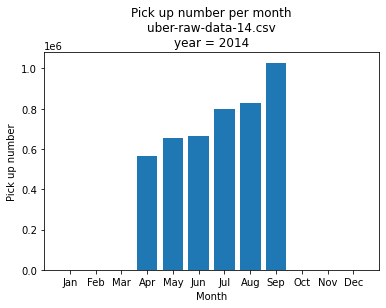

     Monday   Tuesday  Wednesday  Thursday    Friday  Saturday    Sunday
0  0.119416  0.146392   0.153603   0.16654  0.163451  0.142494  0.108104


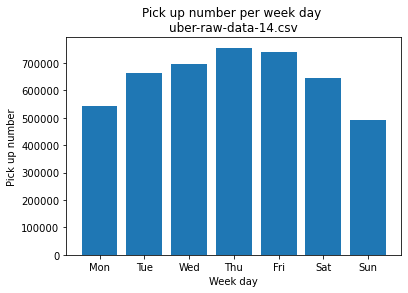

     Monday   Tuesday  Wednesday  Thursday    Friday  Saturday    Sunday
0  0.107811  0.161528   0.192432   0.15069  0.159965  0.136786  0.090788


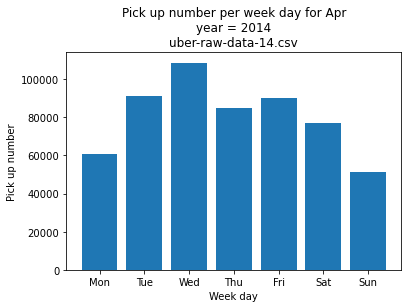

     Monday   Tuesday  Wednesday  Thursday    Friday  Saturday   Sunday
0  0.097858  0.117501   0.137726    0.1976  0.205371  0.157855  0.08609


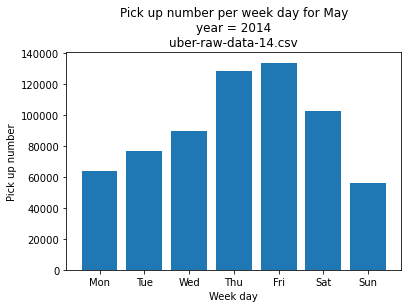

     Monday   Tuesday  Wednesday  Thursday    Friday  Saturday    Sunday
0  0.142586  0.132763   0.150117  0.173723  0.158254  0.122565  0.119992


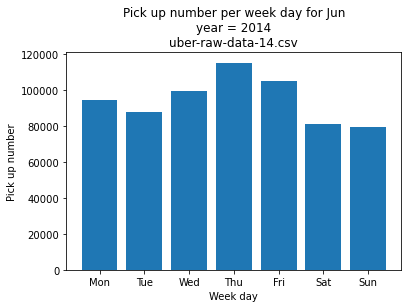

     Monday   Tuesday  Wednesday  Thursday    Friday  Saturday    Sunday
0  0.117054  0.172655   0.185546  0.186453  0.129044  0.113375  0.095874


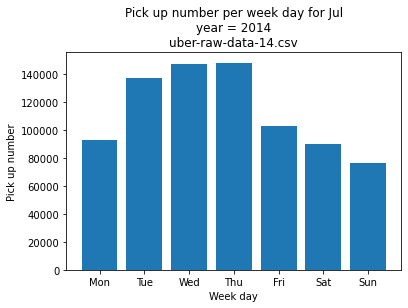

     Monday   Tuesday  Wednesday  Thursday    Friday  Saturday    Sunday
0  0.110498  0.129178   0.138984  0.149669  0.179282  0.159447  0.132943


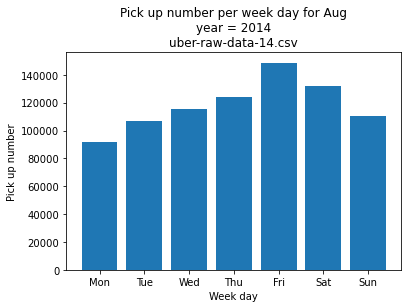

     Monday   Tuesday  Wednesday  Thursday    Friday  Saturday    Sunday
0  0.133531  0.158763   0.131668  0.149081  0.155991  0.157622  0.113343


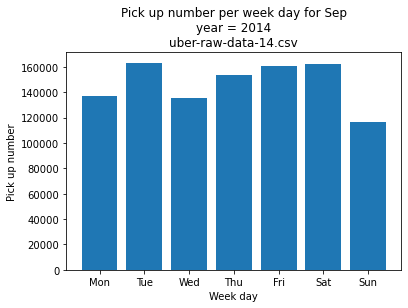

     Monday   Tuesday  Wednesday  Thursday    Friday  Saturday    Sunday
0  0.000000  0.000000   0.000000  0.000000  0.000000  0.000000  0.000000
0  0.000000  0.000000   0.000000  0.000000  0.000000  0.000000  0.000000
0  0.000000  0.000000   0.000000  0.000000  0.000000  0.000000  0.000000
0  0.107811  0.161528   0.192432  0.150690  0.159965  0.136786  0.090788
0  0.097858  0.117501   0.137726  0.197600  0.205371  0.157855  0.086090
0  0.142586  0.132763   0.150117  0.173723  0.158254  0.122565  0.119992
0  0.117054  0.172655   0.185546  0.186453  0.129044  0.113375  0.095874
0  0.110498  0.129178   0.138984  0.149669  0.179282  0.159447  0.132943
0  0.133531  0.158763   0.131668  0.149081  0.155991  0.157622  0.113343
0  0.000000  0.000000   0.000000  0.000000  0.000000  0.000000  0.000000
0  0.000000  0.000000   0.000000  0.000000  0.000000  0.000000  0.000000
0  0.000000  0.000000   0.000000  0.000000  0.000000  0.000000  0.000000


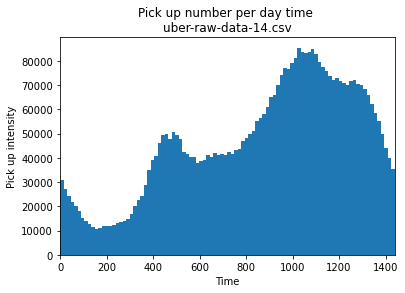

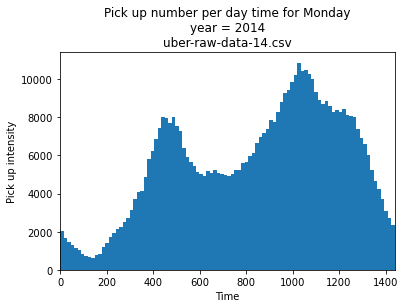

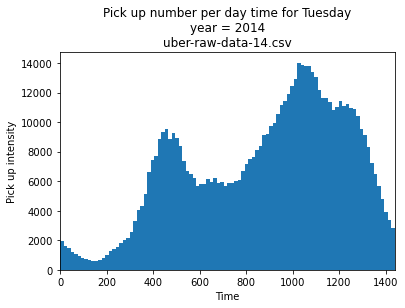

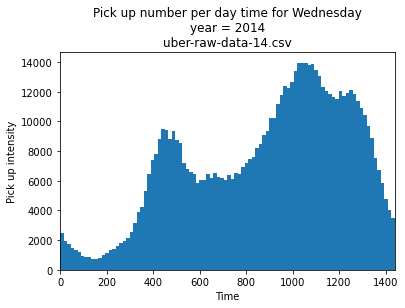

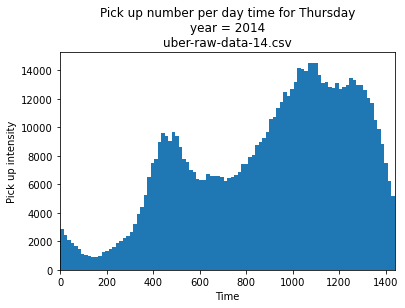

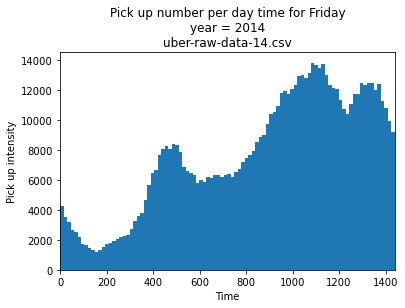

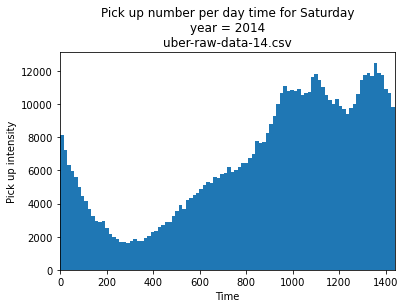

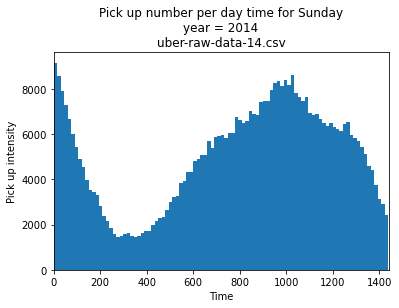

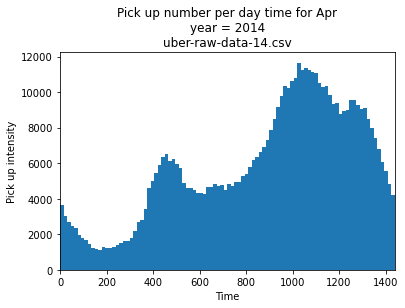

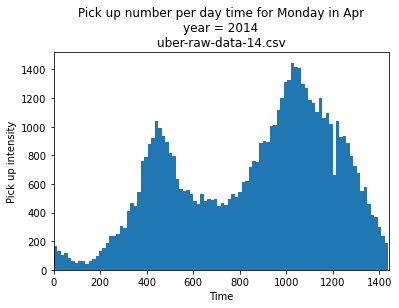

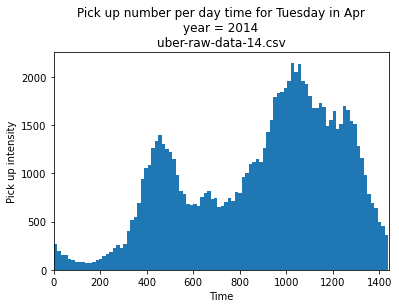

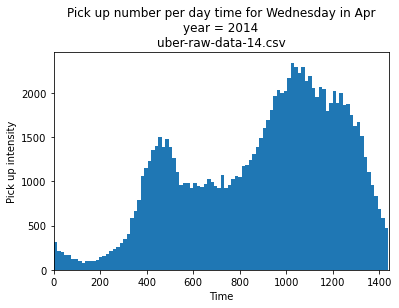

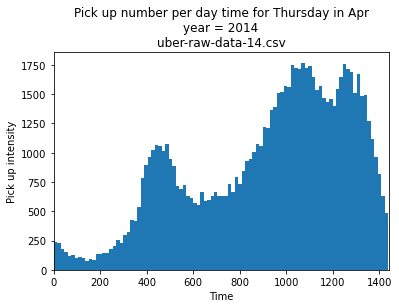

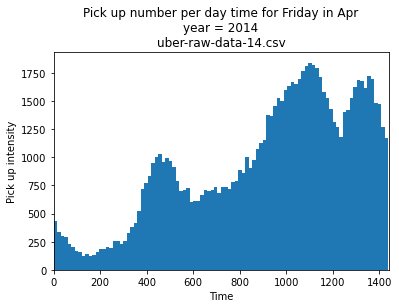

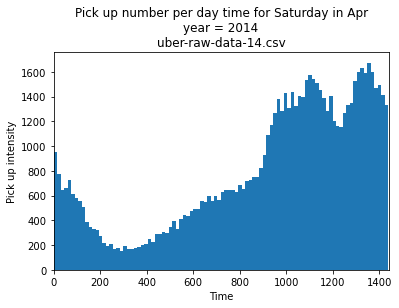

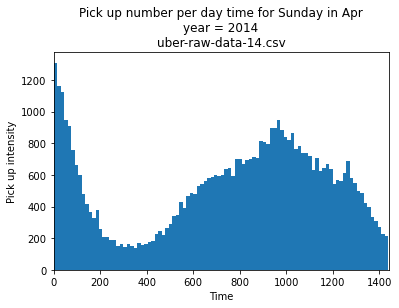

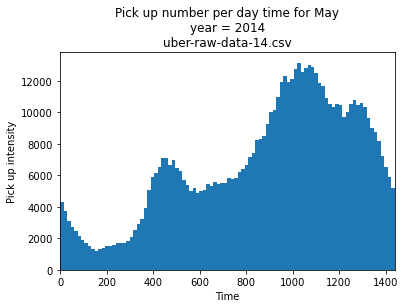

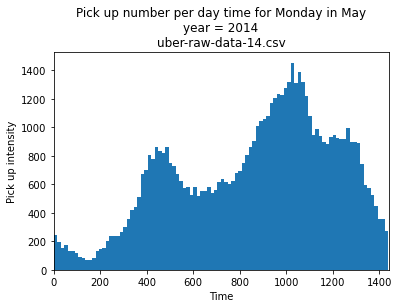

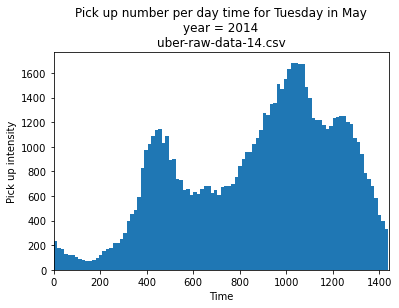

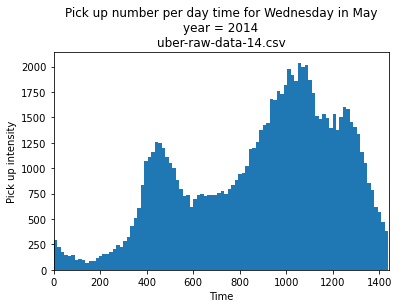

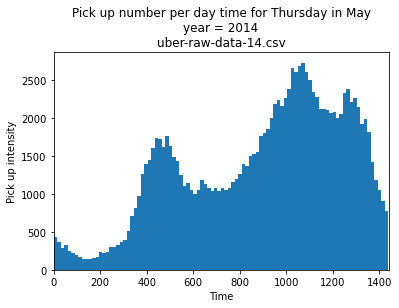

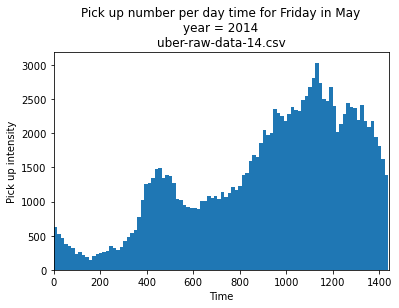

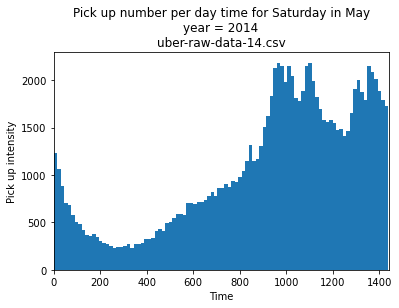

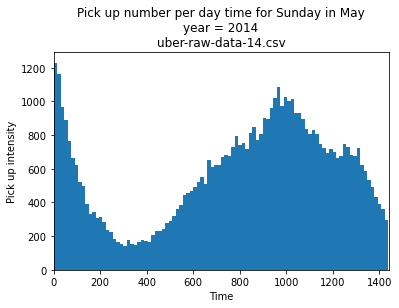

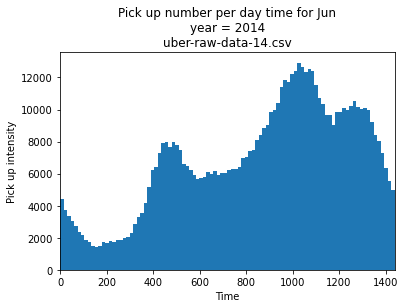

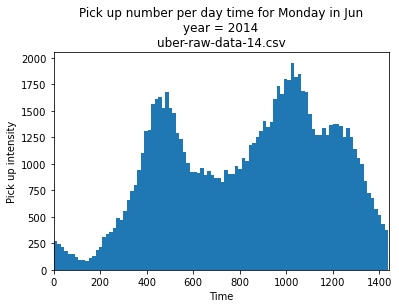

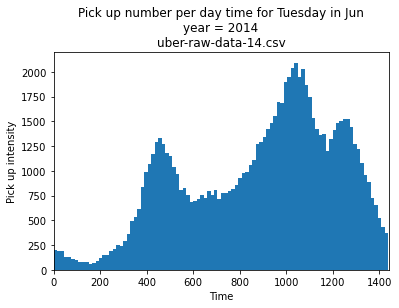

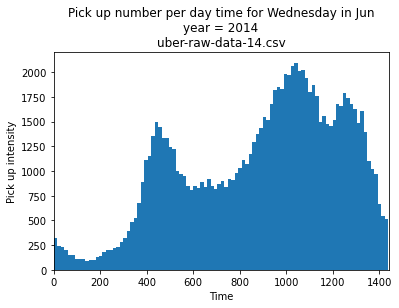

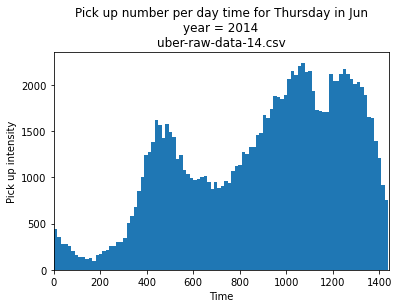

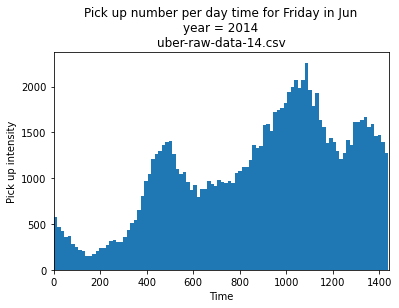

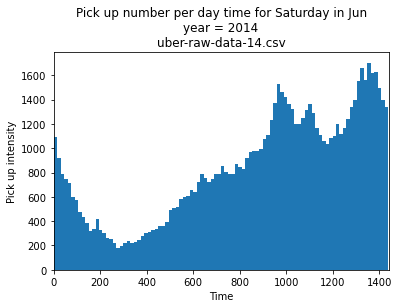

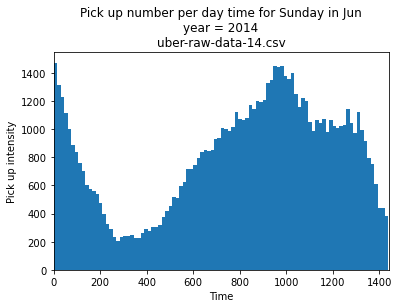

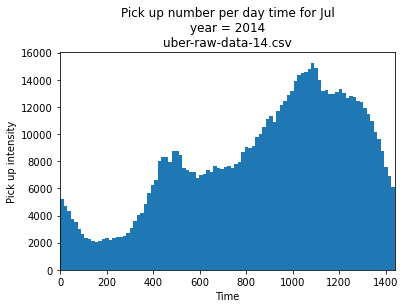

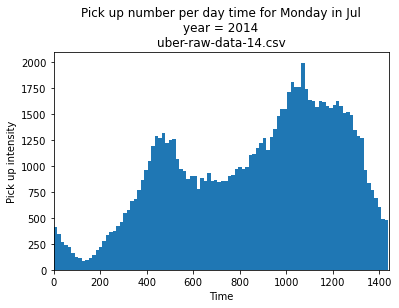

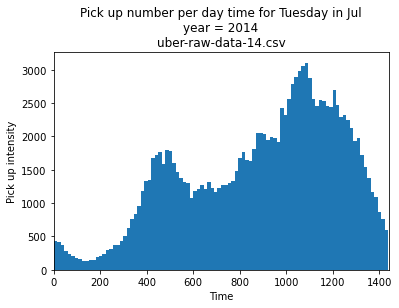

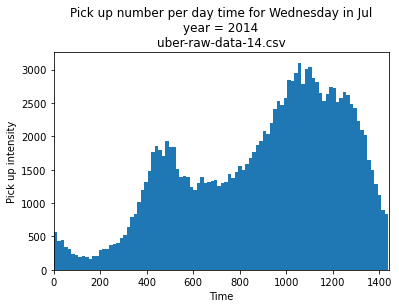

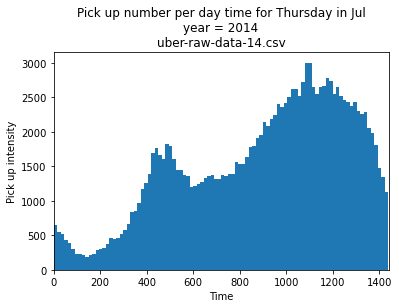

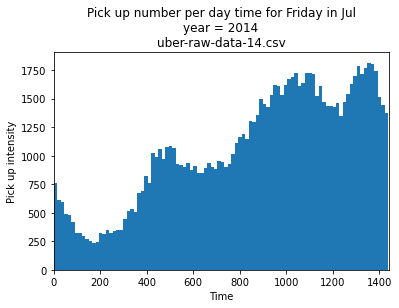

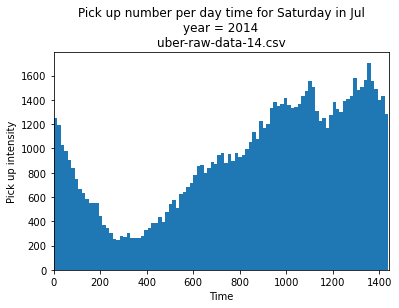

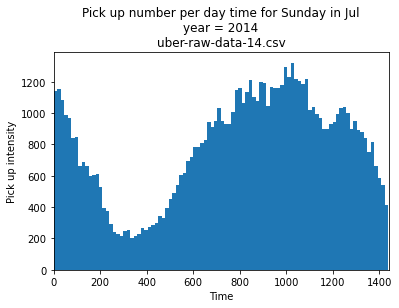

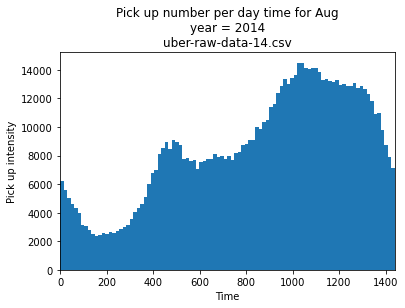

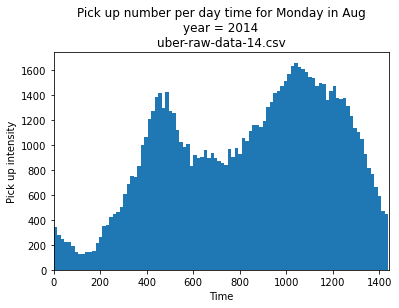

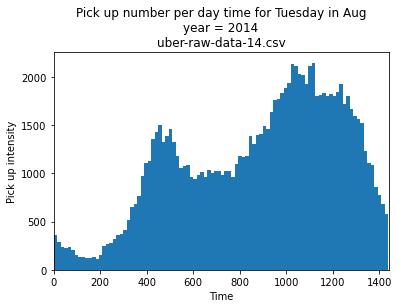

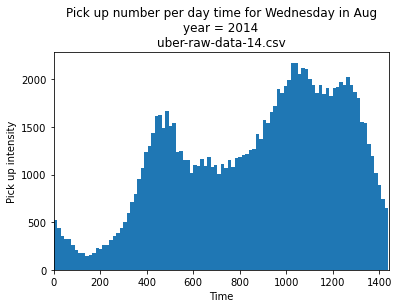

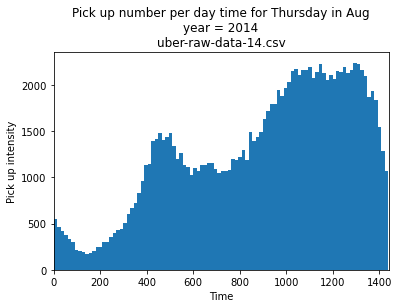

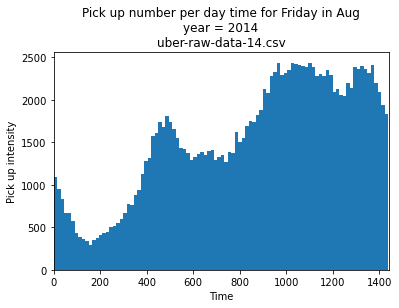

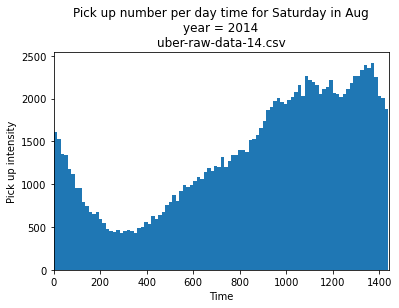

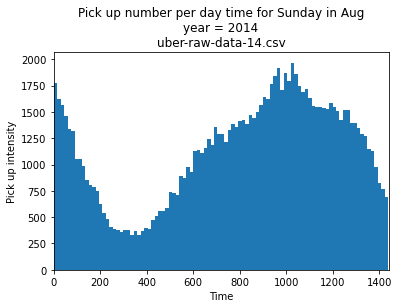

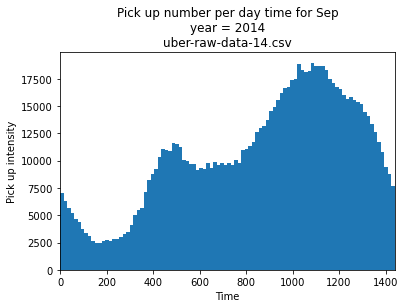

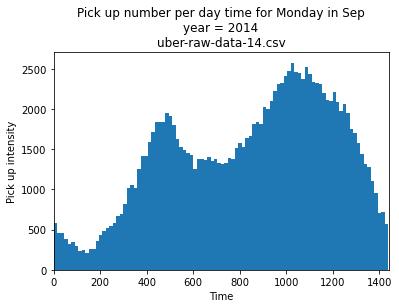

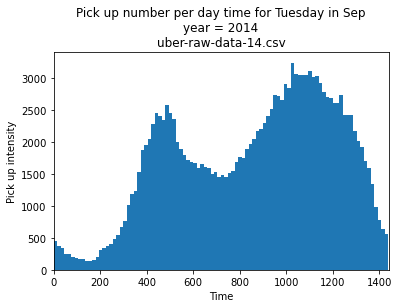

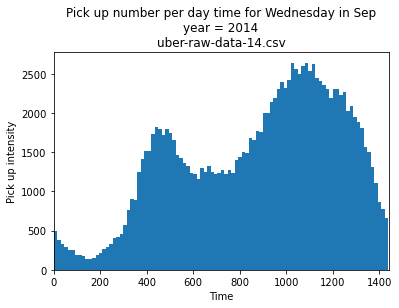

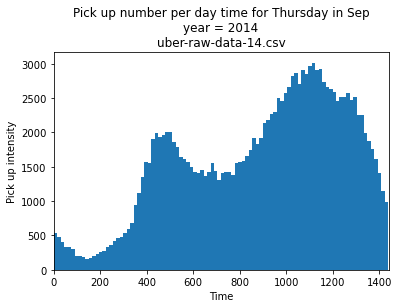

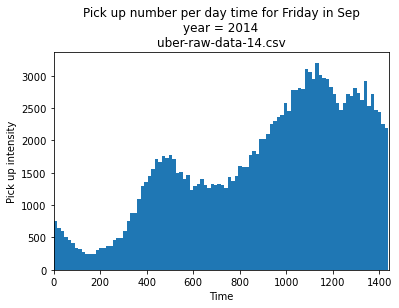

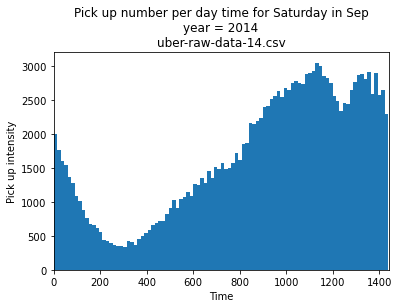

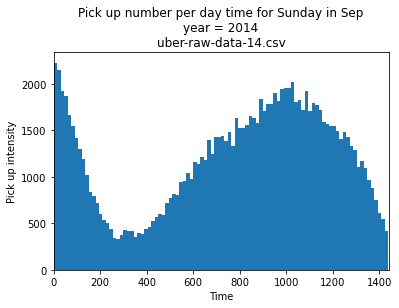

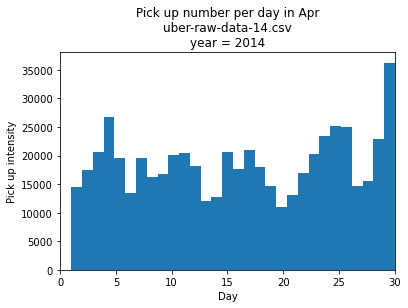

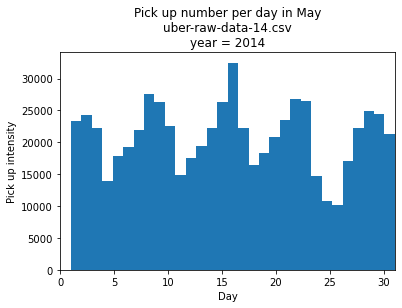

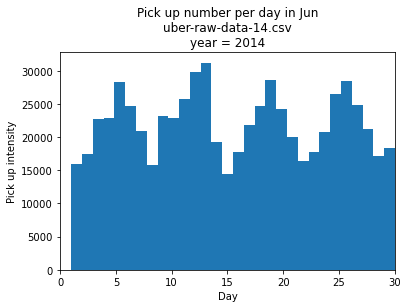

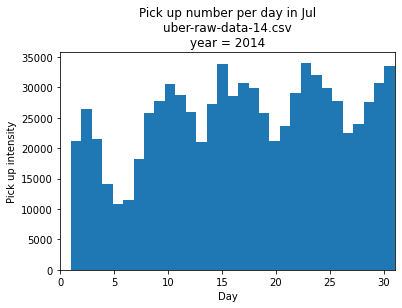

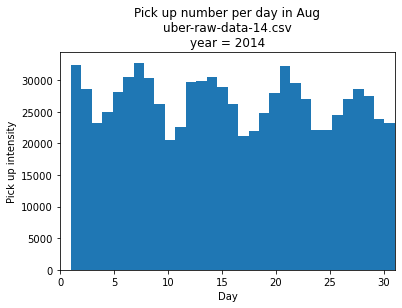

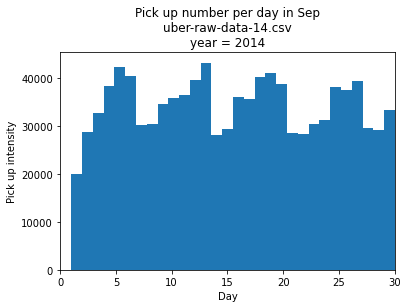

In [23]:
analyze_dataframe("uber-raw-data-14.csv")

        Jan       Feb       Mar       Apr      May       Jun  Jul  Aug  Sep  \
0  0.136912  0.158623  0.158353  0.159829  0.18889  0.197393  0.0  0.0  0.0   

   Oct  Nov  Dec  
0  0.0  0.0  0.0  


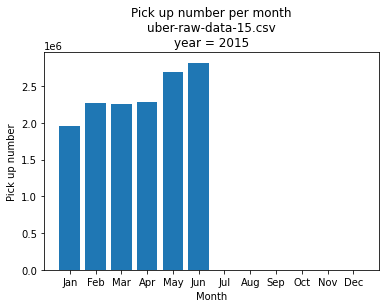

     Monday   Tuesday  Wednesday  Thursday    Friday  Saturday    Sunday
0  0.118724  0.131243   0.132708  0.151333  0.159951    0.1692  0.136841


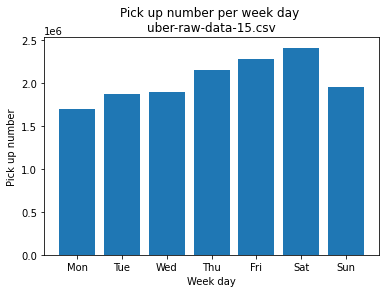

     Monday   Tuesday  Wednesday  Thursday    Friday  Saturday    Sunday
0  0.099296  0.102429   0.128012  0.172245  0.176851  0.201095  0.120073


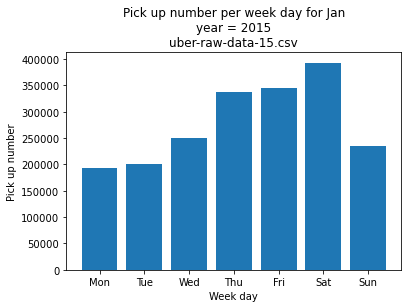

     Monday   Tuesday  Wednesday  Thursday    Friday  Saturday    Sunday
0  0.123548  0.129205    0.12876  0.151173  0.168069  0.165795  0.133451


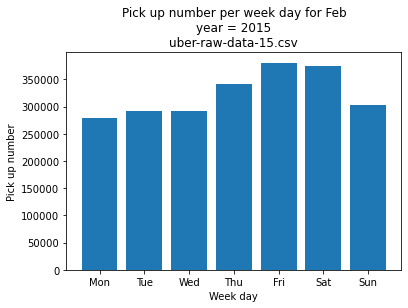

     Monday   Tuesday  Wednesday  Thursday    Friday  Saturday    Sunday
0  0.128102  0.156393   0.124607  0.135357  0.151633  0.152978  0.150931


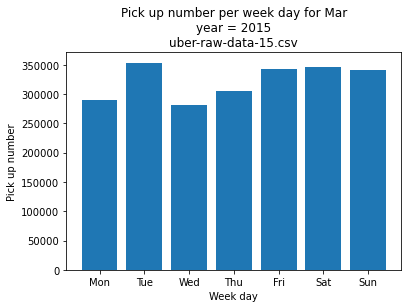

     Monday  Tuesday  Wednesday  Thursday    Friday  Saturday    Sunday
0  0.110959  0.11796   0.160399  0.178372  0.149491  0.154418  0.128402


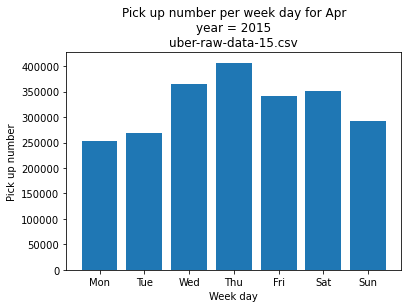

     Monday   Tuesday  Wednesday  Thursday   Friday  Saturday    Sunday
0  0.100877  0.116052   0.128029   0.13771  0.17317  0.188335  0.155828


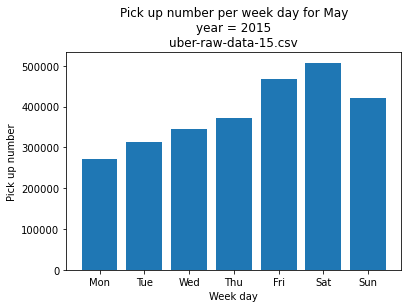

     Monday   Tuesday  Wednesday  Thursday    Friday  Saturday    Sunday
0  0.144167  0.157984   0.127695  0.140918  0.144196  0.156485  0.128555


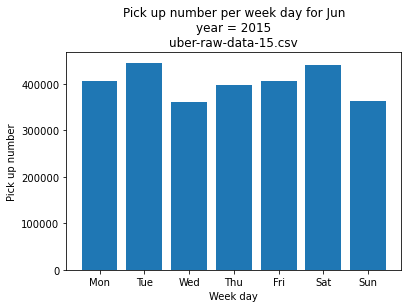

     Monday   Tuesday  Wednesday  Thursday    Friday  Saturday    Sunday
0  0.099296  0.102429   0.128012  0.172245  0.176851  0.201095  0.120073
0  0.123548  0.129205   0.128760  0.151173  0.168069  0.165795  0.133451
0  0.128102  0.156393   0.124607  0.135357  0.151633  0.152978  0.150931
0  0.110959  0.117960   0.160399  0.178372  0.149491  0.154418  0.128402
0  0.100877  0.116052   0.128029  0.137710  0.173170  0.188335  0.155828
0  0.144167  0.157984   0.127695  0.140918  0.144196  0.156485  0.128555
0  0.000000  0.000000   0.000000  0.000000  0.000000  0.000000  0.000000
0  0.000000  0.000000   0.000000  0.000000  0.000000  0.000000  0.000000
0  0.000000  0.000000   0.000000  0.000000  0.000000  0.000000  0.000000
0  0.000000  0.000000   0.000000  0.000000  0.000000  0.000000  0.000000
0  0.000000  0.000000   0.000000  0.000000  0.000000  0.000000  0.000000
0  0.000000  0.000000   0.000000  0.000000  0.000000  0.000000  0.000000


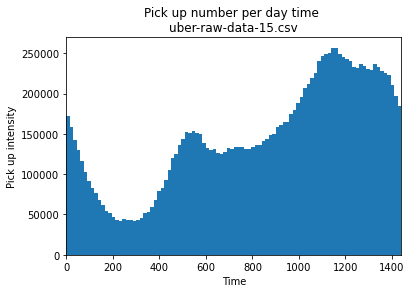

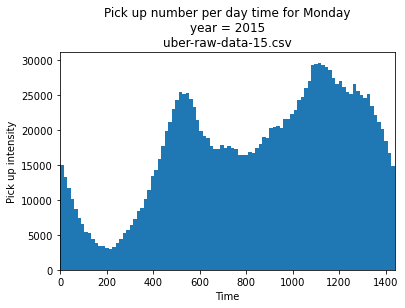

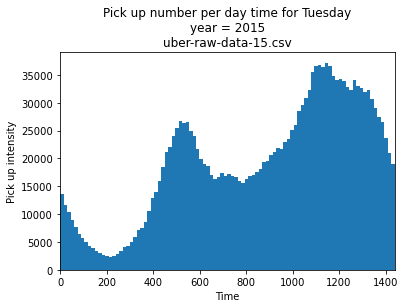

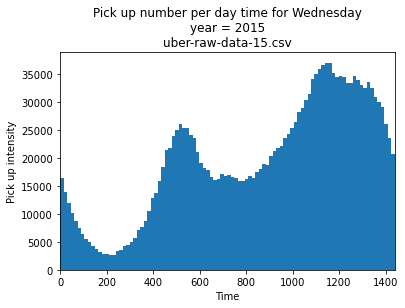

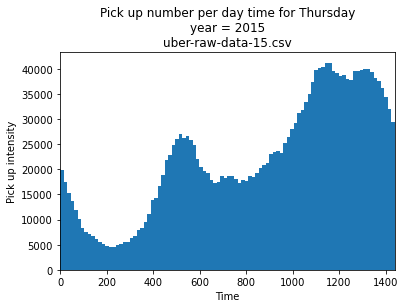

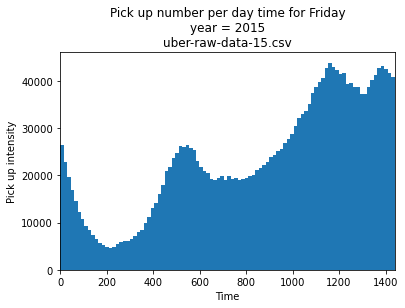

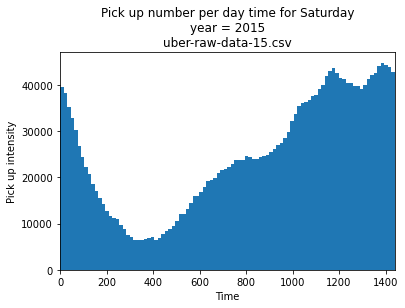

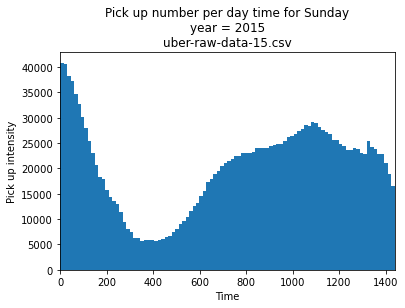

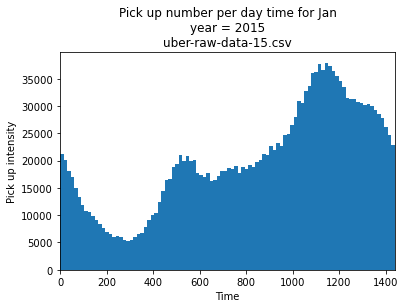

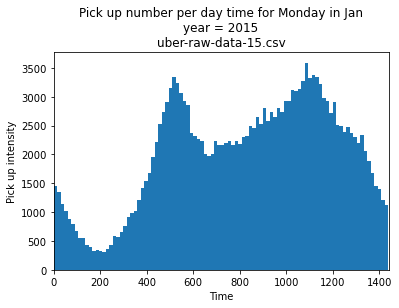

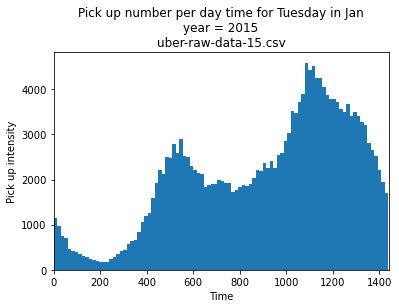

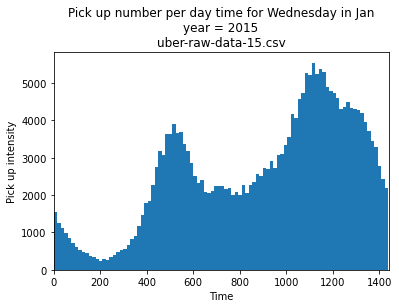

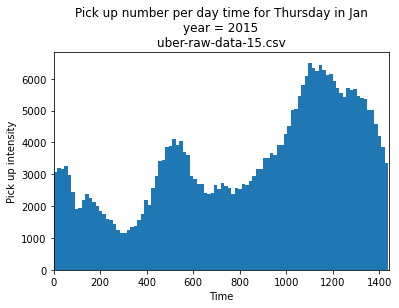

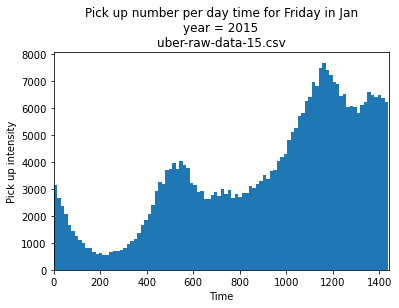

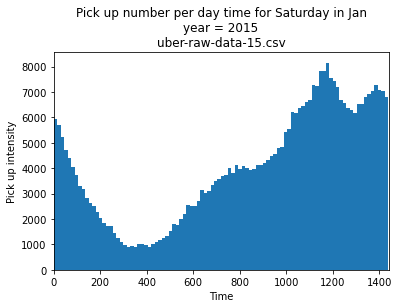

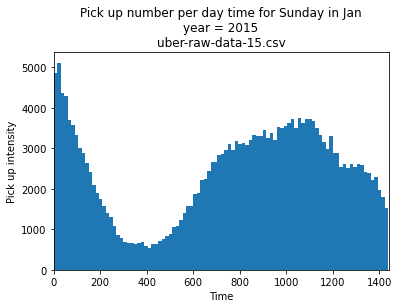

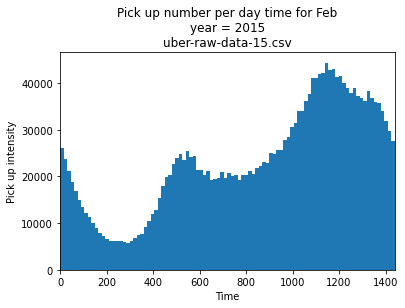

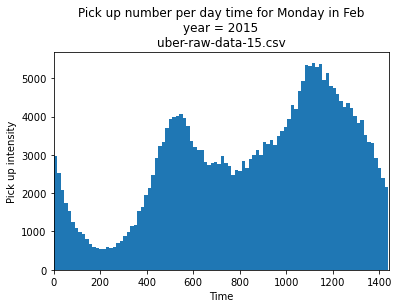

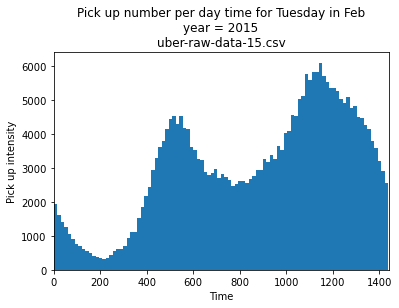

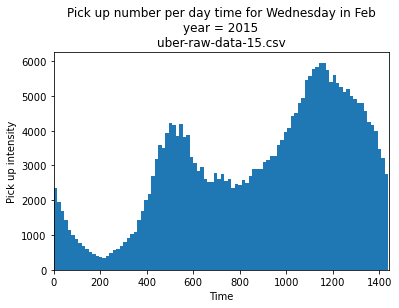

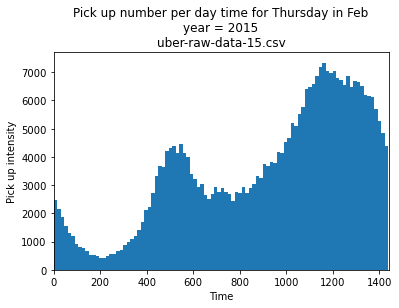

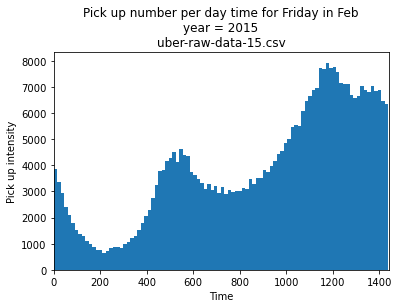

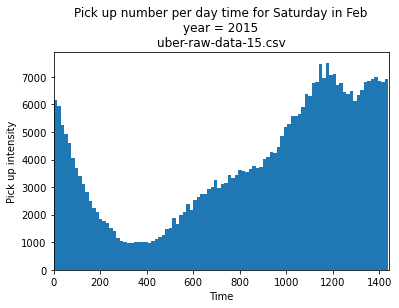

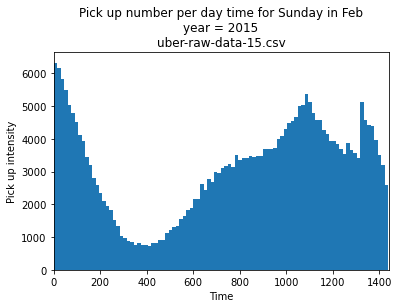

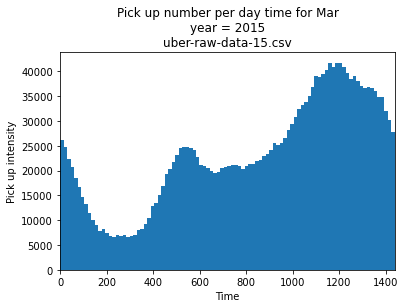

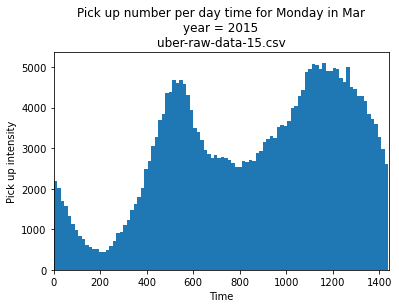

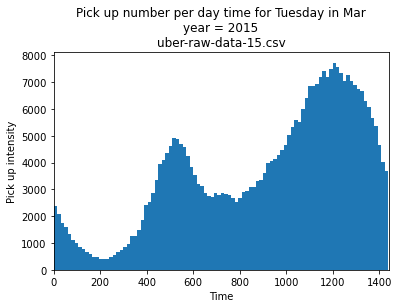

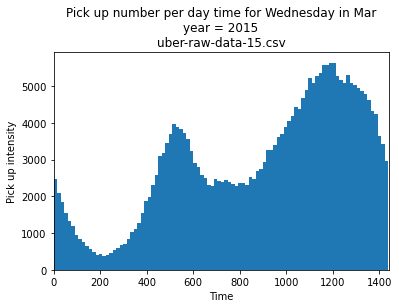

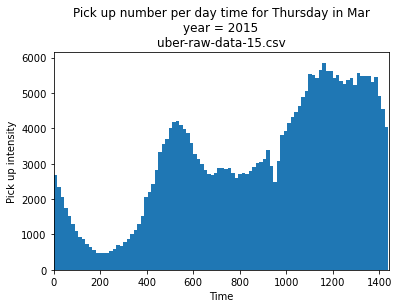

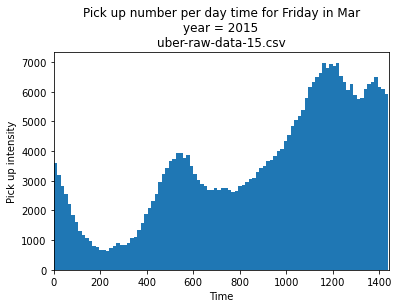

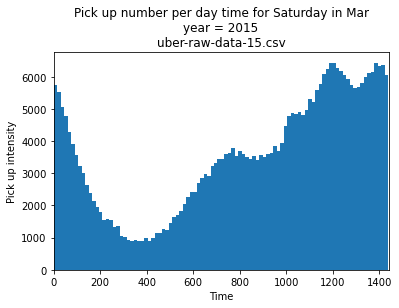

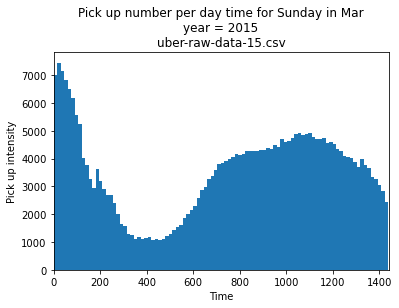

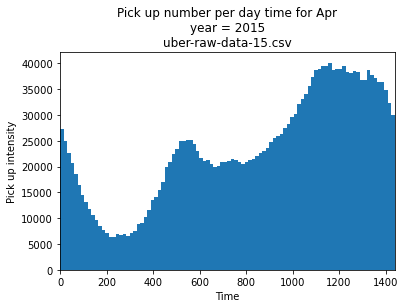

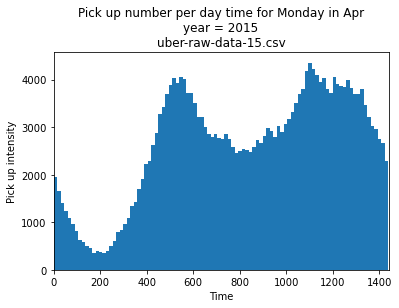

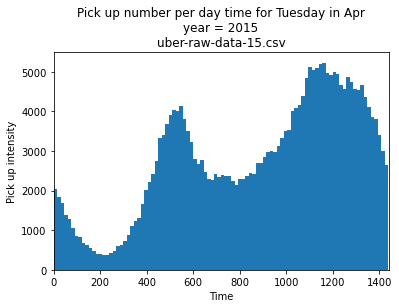

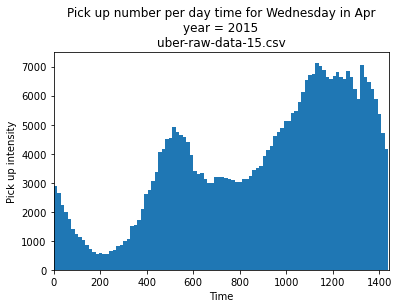

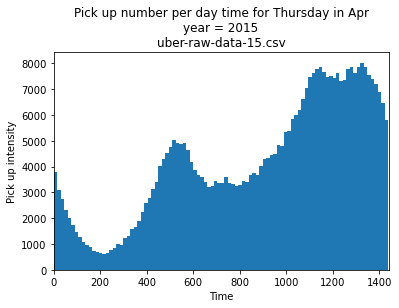

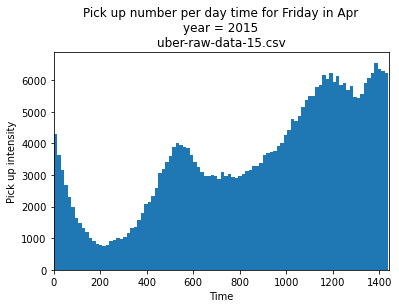

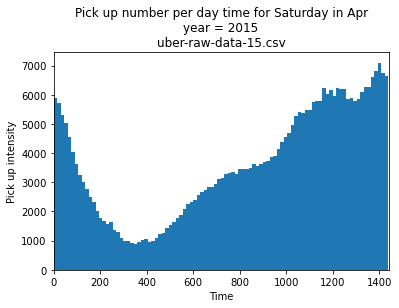

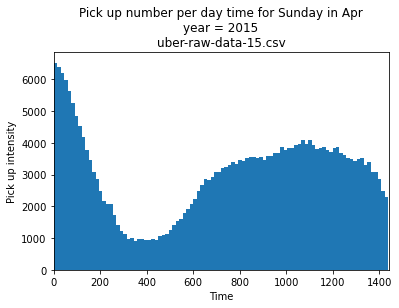

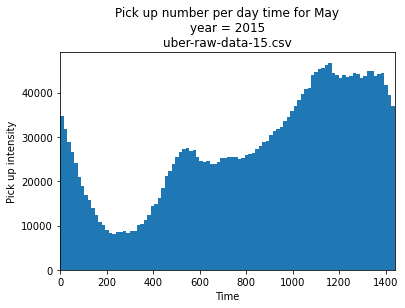

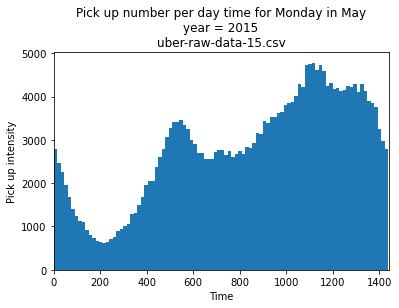

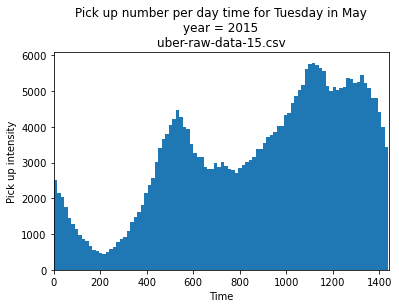

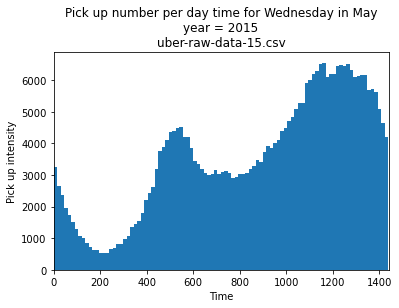

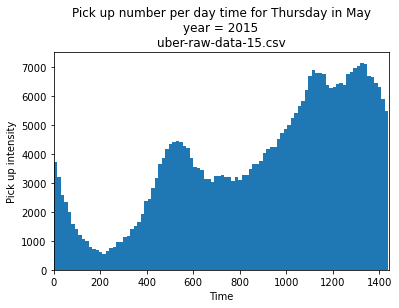

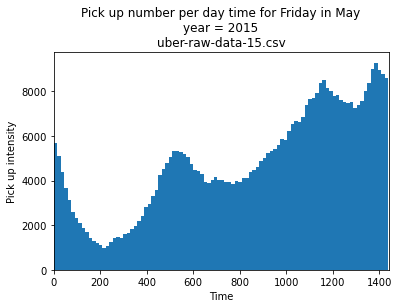

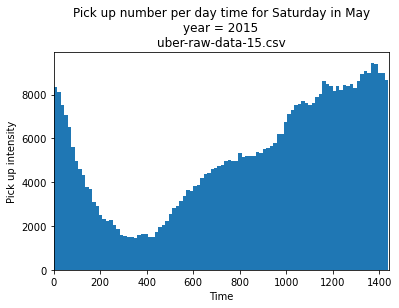

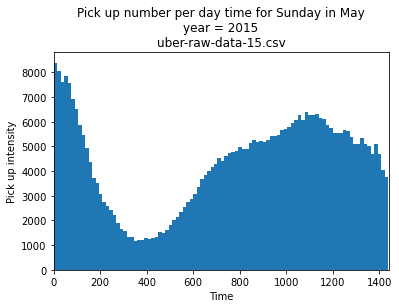

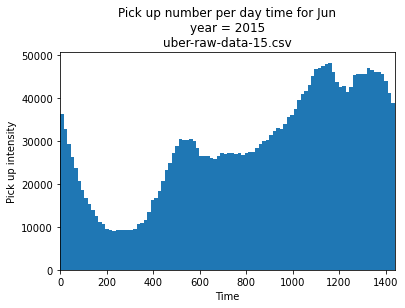

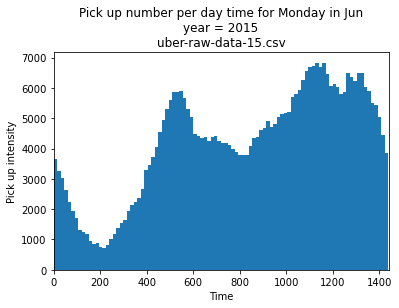

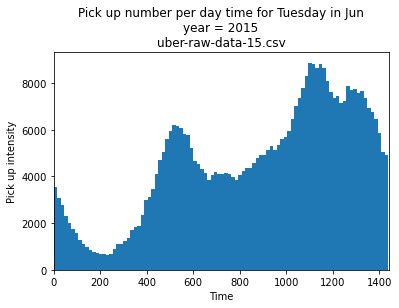

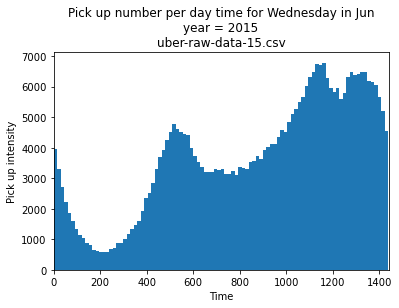

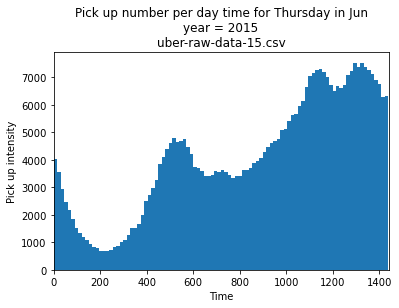

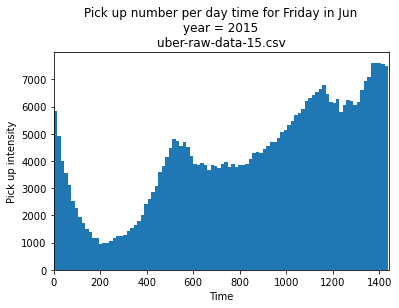

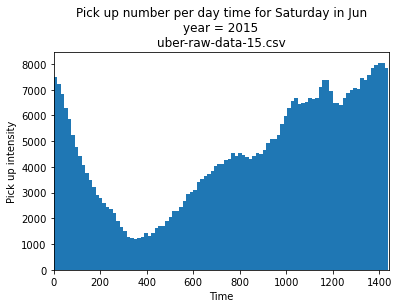

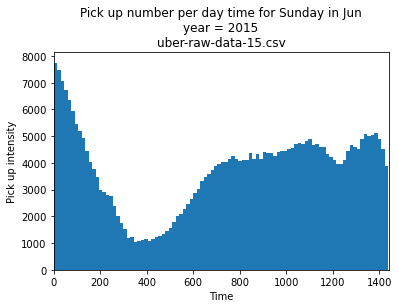

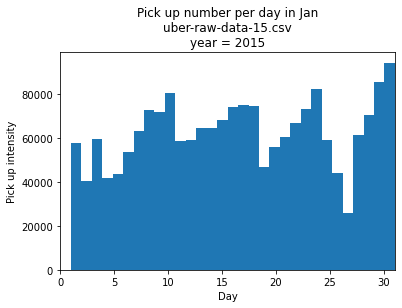

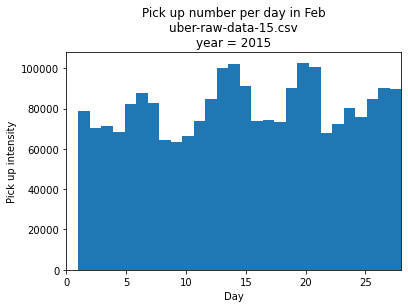

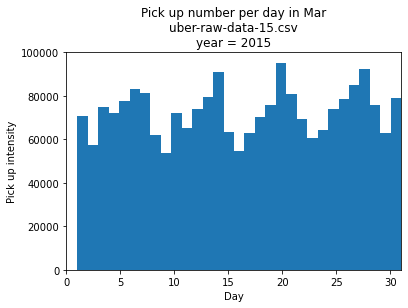

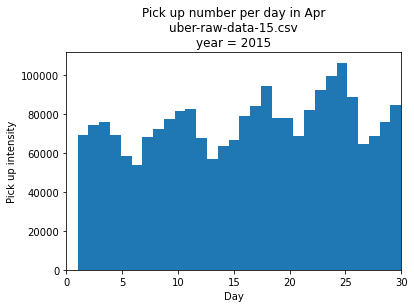

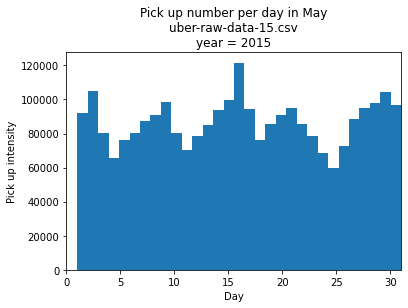

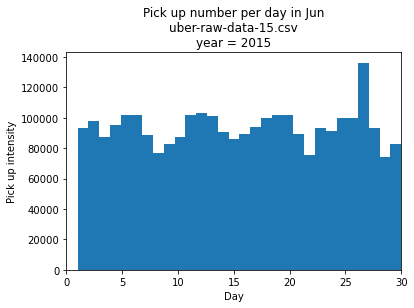

In [24]:
analyze_dataframe("uber-raw-data-15.csv")